In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("covid-variants.csv")

In [3]:
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
df.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

In [6]:
df.tail()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [8]:
df['location'].value_counts()

Bangladesh        1080
Belgium           1080
United States     1080
United Kingdom    1080
France            1080
                  ... 
Montenegro         384
Monaco             360
Fiji               336
Benin              336
Brunei             240
Name: location, Length: 121, dtype: int64

In [9]:
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [10]:
omicron=df[df["variant"]=="Omicron"]
delta=df[df["variant"]=="Delta"]
beta=df[df["variant"]=="Beta"]
others=df[(df["variant"]!="Delta")&(df["variant"]!="Omicron")&(df["variant"]!="Beta")]

In [14]:
omicron_world=omicron.groupby("date").sum()
omicron_world["date"]=omicron_world.index
delta_world=delta.groupby("date").sum()
delta_world["date"]=delta_world.index
beta_world=beta.groupby("date").sum()
beta_world["date"]=beta_world.index
others_world=others.groupby("date").sum()
others_world["date"]=others_world.index

In [19]:
omicron_India=omicron[omicron["location"]=="India"]
delta_India=delta[delta["location"]=="India"]
beta_India=beta[beta["location"]=="India"]
others_India=others[others["location"]=="India"]
others_group=others_India.groupby("date").sum()
others_group["date"]=others_group.index

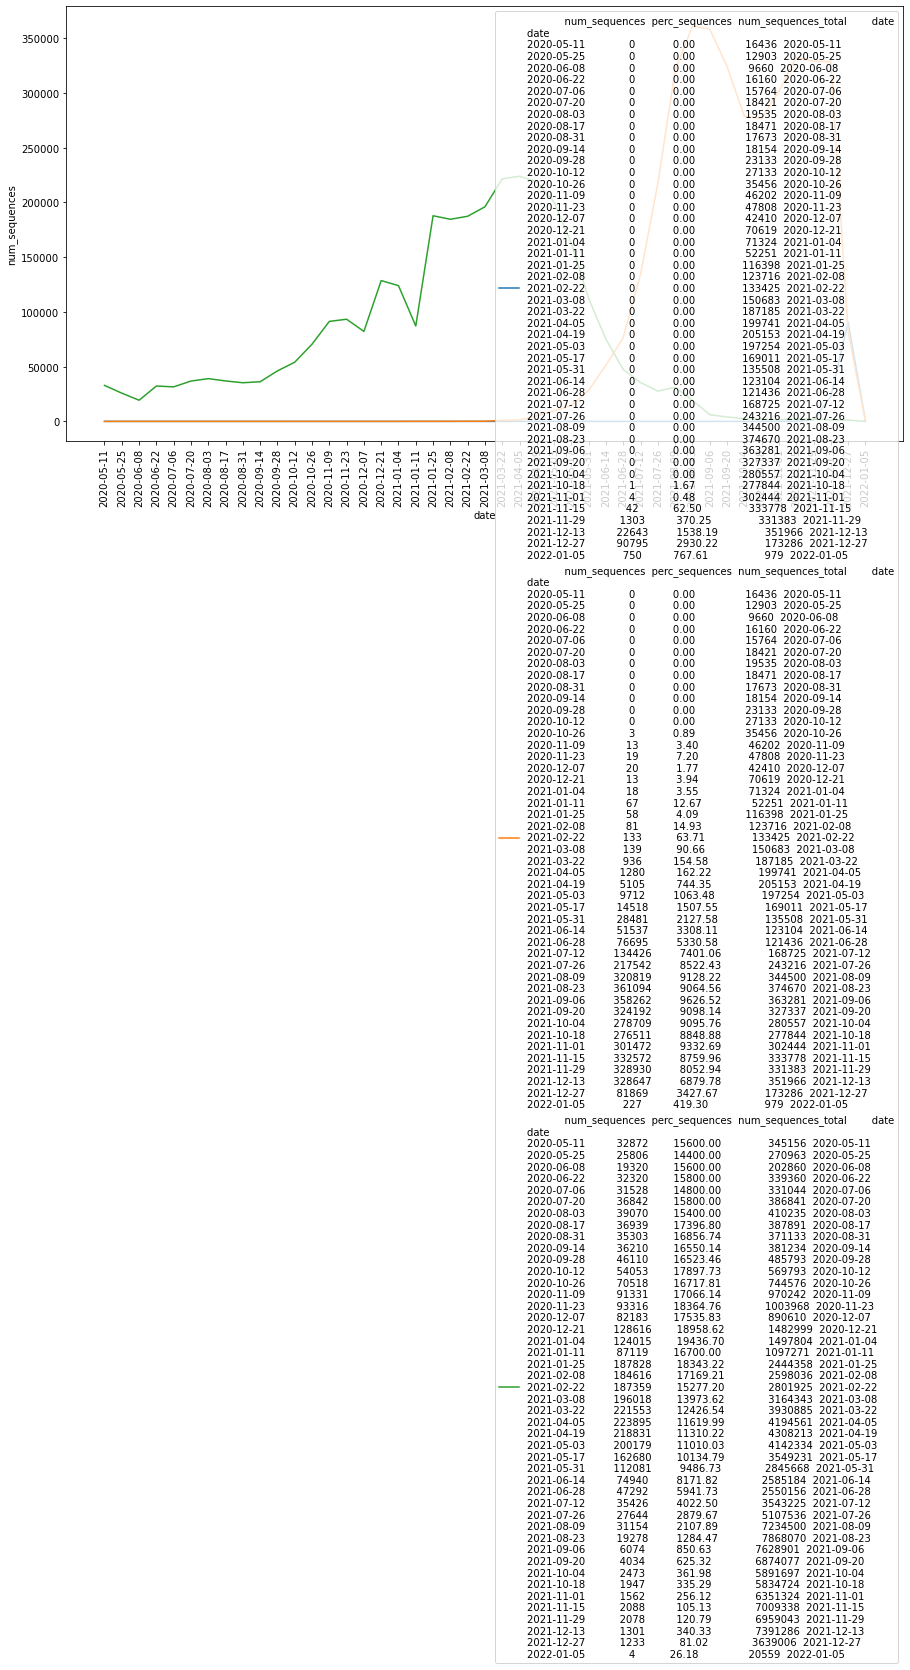

In [20]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world["date"],y=omicron_world["num_sequences"],label=omicron_world)
sns.lineplot(x=delta_world["date"],y=delta_world["num_sequences"],label=delta_world)
sns.lineplot(x=others_world["date"],y=others_world["num_sequences"],label=others_world)
plt.show()

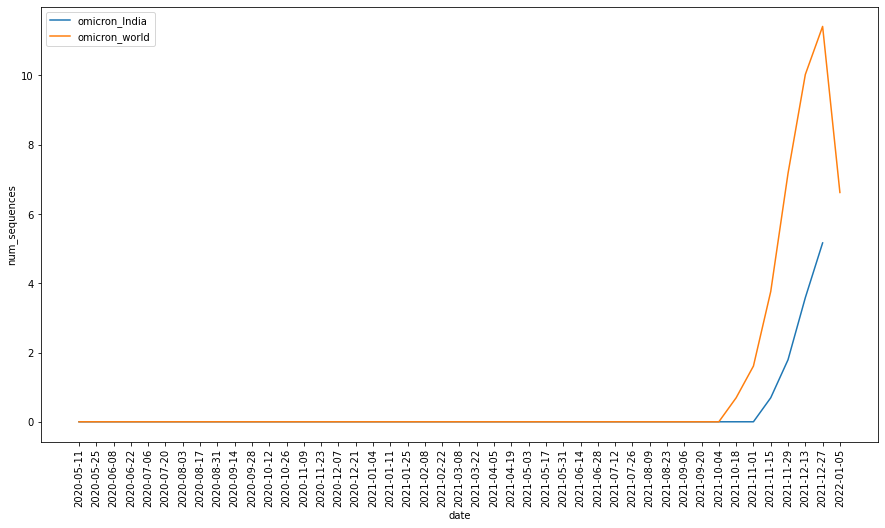

In [22]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_India["date"],y=np.log1p(omicron_India["num_sequences"]),label="omicron_India")
sns.lineplot(x=omicron_world["date"],y=np.log1p(omicron_world["num_sequences"]),label="omicron_world")
plt.show()

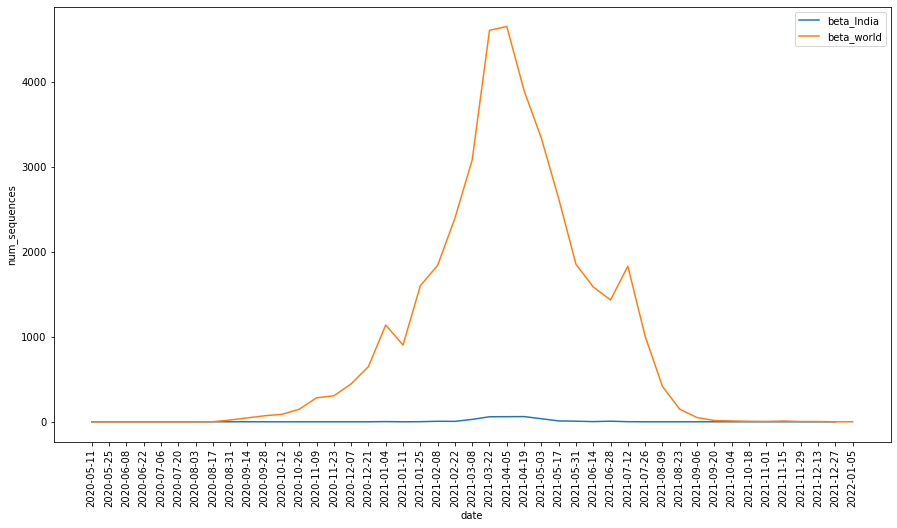

In [25]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=beta_India["date"],y=beta_India["num_sequences"],label="beta_India")
sns.lineplot(x=beta_world["date"],y=beta_world["num_sequences"],label="beta_world")
plt.show()

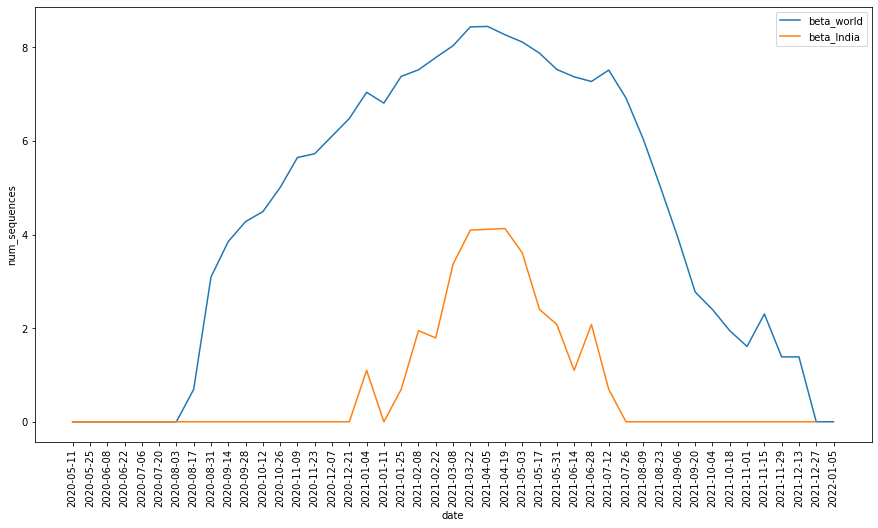

In [26]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=beta_world['date'], y=np.log1p(beta_world['num_sequences']),label="beta_world")
sns.lineplot(x=beta_India['date'], y=np.log1p(beta_India['num_sequences']),label="beta_India")
plt.show()